### Task 4 - ROBUSTEZZA

Importiamo i moduli necessari

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Leggiamo il nostro grafo e contiamo il numero di nodi e archi

In [50]:
input_file = 'cit-HepTh.edges'
output_file = 'cit-HepTh_2.edges'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        columns = line.split()
        if len(columns) > 2:
            del columns[2]
        outfile.write(' '.join(columns) + '\n')

In [53]:
def read_custom_edgelist(file_path):
    G = nx.DiGraph()
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                u, v = parts[:2]
                G.add_edge(u, v)
    return G

G = read_custom_edgelist('cit-HepTh_2.edges')

In [20]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 22910
Number of edges: 2444799


### Bridges

In [56]:
G_un = G.to_undirected()
nx.has_bridges(G_un)

True

La chiamata .has_bridges ci restituisce un booleano True/False che ci dice se il nostro grafo presenta dei bridge. Innanzi tutto dobbiamo passare rendere il grafo undirected, altrimenti la funzione .has_bridges non potrà essere applicata. 
Ricordiamo che i bridge sono gli archi deboli della strong triadic closure, vale a dire quegli archi che connettono componenti separate che se venissero rimossi scomporrebbero il grafo oppure aumenterebbero la lunghezza dei cammini che permette di smostarsi da una componente all'altra.

In [58]:
list(nx.bridges(G_un))

[('%', 'sym'),
 ('7', '22367'),
 ('7', '22574'),
 ('5282', '21733'),
 ('158', '1745'),
 ('250', '21393'),
 ('287', '22483'),
 ('1691', '14788'),
 ('3832', '22351'),
 ('4525', '22355'),
 ('4561', '22654'),
 ('16052', '22262'),
 ('610', '19180'),
 ('1396', '21413'),
 ('2242', '6558'),
 ('10632', '21881'),
 ('21654', '21655'),
 ('3158', '22713'),
 ('10125', '10124'),
 ('12102', '21619'),
 ('482', '18583'),
 ('1262', '11211'),
 ('1346', '22609'),
 ('1513', '17964'),
 ('2050', '21645'),
 ('2452', '22288'),
 ('2778', '22473'),
 ('4669', '16542'),
 ('6744', '20844'),
 ('6999', '10688'),
 ('6999', '13815'),
 ('6999', '17322'),
 ('8549', '14589'),
 ('10019', '22747'),
 ('895', '20944'),
 ('2652', '20227'),
 ('5599', '22024'),
 ('6273', '22539'),
 ('6402', '13352'),
 ('6536', '9908'),
 ('6842', '20905'),
 ('7331', '22105'),
 ('8744', '22422'),
 ('9957', '18896'),
 ('10721', '20470'),
 ('10820', '21664'),
 ('11070', '22839'),
 ('12391', '22346'),
 ('13022', '21201'),
 ('3472', '19387'),
 ('3472',

Con questo comando abbiamo prodotto la lista di tutte le connessioni tra nodi che costituiscono dei bridges tra componenti e che, se rimossi, potrebbero modificare la struttura del nostro grafo.

**Local Bridges**

In [59]:
list(nx.local_bridges(G_un, with_span=True))

[('%', 'sym', inf),
 ('7', '22367', inf),
 ('7', '22574', inf),
 ('5282', '21733', inf),
 ('158', '1745', inf),
 ('250', '21393', inf),
 ('287', '22483', inf),
 ('296', '5629', 3),
 ('1212', '22751', 3),
 ('1691', '14788', inf),
 ('3035', '11629', 3),
 ('3832', '22351', inf),
 ('4525', '22355', inf),
 ('4561', '22654', inf),
 ('10491', '9519', 3),
 ('16052', '22262', inf),
 ('610', '19180', inf),
 ('688', '17036', 4),
 ('1006', '6961', 3),
 ('1396', '21413', inf),
 ('2242', '6558', inf),
 ('10632', '21881', inf),
 ('21654', '21655', inf),
 ('1041', '11103', 3),
 ('3158', '22713', inf),
 ('10125', '10124', inf),
 ('12102', '21619', inf),
 ('482', '18583', inf),
 ('1262', '11211', inf),
 ('1289', '9321', 3),
 ('1346', '22609', inf),
 ('1513', '17964', inf),
 ('2050', '21645', inf),
 ('2425', '10742', 3),
 ('2452', '21815', 3),
 ('2452', '22288', inf),
 ('2778', '22473', inf),
 ('3542', '17619', 4),
 ('4669', '16542', inf),
 ('6744', '20844', inf),
 ('6948', '9212', 3),
 ('6999', '10688',

La chimata .local_bridges permette di calcolare per ogni coppia di archi che costituiscono un bridge, forniscono la lunghezza del cammino nel caso in cui venissero rimossi.  

Se si tratta di local bridges, ottengo un numero che indica la lunghezza del cammino; se ottengo "inf" allora mi trovo davanti a dei global bridges - i global bridges sono quegli archi la cui rimozione comporrebbe la scomposizione del grafo

Considerando la grandezza del grafo, cerchiamo di vedere quante coppie danno "inf" (i.e. sono global bridges) e quante coppie invece si troverebbero ad avere solo un cammino di lunghezza diversa nel caso in cui il loro arco venisse rimosso.

In [61]:
bridges_list = list(nx.local_bridges(G_un, with_span=True))

In [63]:
global_edges = []
global_edges_count = 0
local_edges = []
local_edges_count = 0

for e, s, p in bridges_list:
  if str(p) == 'inf':
    global_edges_count += 1
    global_edges.append(e)
  else:
    local_edges_count += 1
    local_edges.append(e)


print("Global edges count:", global_edges_count)
print("Local edges count:", local_edges_count)




Global edges count: 303
Local edges count: 151


In [64]:
len(bridges_list)

454

### Tie Strength

La neighborhood overlap (o Jaccard) è una misura che ci permette di vedere quanti vicini sono comuni a due nodi e normalizzare la quantità di vicini. Se l'overlap è 0, allora si ha un local bridge. All'aumentare dei vicini in comune, si ha un incremento della forza del legame. 

L'overlap e la betweennes hanno una correlazione inversa. 

In [65]:
def node_overlap(g):
    for u, v in g.edges():
        n_u = set(g.neighbors(u)) # set of u neighbors
        n_v = set(g.neighbors(v)) # set of v neighbors
        overlap = len(n_u & n_v) / len(n_u | n_v) # Neighborhood Overlap
        g[u][v]['overlap'] = overlap
    return g

In [66]:
g = node_overlap(G_un)

Qui plottiamo la KDE (Kernel Density Estimation) della Neighborhood Overlap

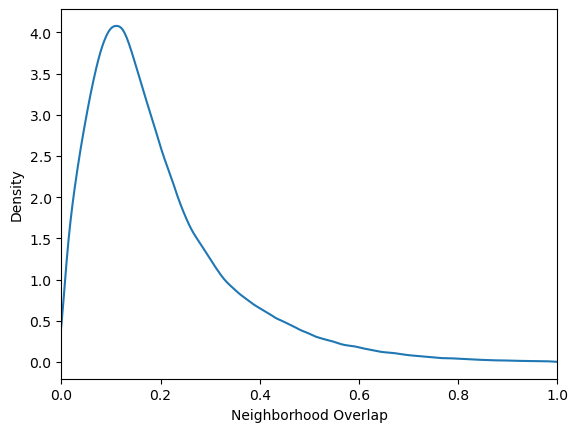

In [67]:
weights = [e[-1]['overlap'] for e in g.edges(data=True)]
pd.DataFrame(weights)[0].plot.kde()
plt.xlabel("Neighborhood Overlap")
plt.xlim(0,1)
plt.show()

Questo grafico mostra come la maggior parte dei nodi hanno una misura di overlap che si attesta attorno allo 0.2, mentre il valore dell'overlap sale per pochi nodi. Nel complesso, il grado presenta molti overlaps - come d'altro canto ci ha fatto già notare l'analisi dei global bridges. 

Plotting the KDE (Kernel Density Estimation) of Interactions Weights

In [68]:
weights_cit = [d['weights'] for u,v,d in g.edges(data=True)]
pd.DataFrame(weights_cit)[0].plot.kde()
plt.xlabel("Interaction Weights")
plt.xlim(0,max(weights_cit))
plt.show()

KeyError: 'weights'

### Network Resilience

Definiamo la soglia Molloy-Reed.

Ricordiamo che Molloy-Reed è un metodo statistico basato sul fatto che se un nodo ha una connessione con altri due nodi, allora ha almeno 2 vicini. Il Molloy-Reed può essere usato per ricavare una soglia critica, ovvero il punto in cui la rete comincia a disfarsi. 

Il M-R suggerisce che se la distribuzione della rete è una power law a bassa skewness, allora il sistema è stabile e per disfare la rete c'è bisogno di rimuovere tutti i nodi. Tuttavia, se il sistema è eterogeneo, può essere smantellato rimuovendo casualmente una certa percentuale di nodi. Ovviamente, queste percentuale può essere più piccola se la rimozione non è casuale e si attaccano nodi o hubs specifici. 

Fonte: https://www.worldquant.com/ideas/connecting-the-dots-of-network-science/#:~:text=Molloy%2DReed%20can%20be%20used,remove%20all%20of%20the%20nodes. 

In [72]:
def molloy_reed(degrees):
    return (np.mean(degrees)*(np.mean(degrees)+1))/np.mean(degrees)

def breakdown_threshold(degrees):
    K = molloy_reed(degrees)
    return 1 - (1/(K-1))

In [73]:
gg = list(dict(G_un.degree()).values())

molloy_reed(gg)

214.4263640331733

Se il M-R ha un valore > di 2, questo significa che la rete ha una giant component, cosa che indica che è molto probabile che la maggior parte dei nodi è connessa tra loro a formare una componente grande. Il numero che abbiamo ricavato, 214, suggerisce che siamo davanti a una rete che ha una giant component in cui i la maggior parte dei nodi sono connessi. Un numero così alto, suggerisce anche che la rete è molto robusta - ma questo si vede meglio dal breakdown threshold. 

In [74]:
breakdown_threshold(gg)

0.995314543240569

Con questa funziona abbiamo calcolato la porzione di nodi che dovrebbero essere rimossi per compromettere la giant component e ritrovarsi con componenti separate. Il valore ottenuto è 0.99, incredibilmente alto - dal momento che significa che sola la rimozione del 99% dei nodi o archi può portare allo smantellamento della rete. 

La buona notizia è senza dubbio che la ricerca in high energy physics! 

### Random Failures

In [90]:
# Select only nodes with degree > 5000 
GG = G_un.to_directed()
G_cc = list(nx.weakly_connected_components(GG))
G_GC = nx.subgraph(G, max(G_cc, key=len))

vs = [n for n in list(G_GC.nodes) if G_GC.degree(n) > 2500]

# "Induced" subgraph: graph composed by
# - a set of vertices (from the original graph)
# - only the edges connecting those vertices (in the original subgraph)
G_sub = G_GC.subgraph(vs)
G_sub_u = G_sub.to_undirected()
print(G_sub)

DiGraph with 11 nodes and 55 edges


In [91]:
def random_node(g): # select a random node from graph
    return [np.random.choice(g.nodes())]

def dismantle(g, function, **args): # incrementally removes node from a graph and computes size of connected components
    total_nodes = g.number_of_nodes()
    removed_nodes = []
    components = []
    while len(g.nodes()) > 1:
        n = function(g, **args)[0]
        g.remove_node(n)
        removed_nodes.append((len(removed_nodes)+1)/total_nodes)
        comps = list(nx.connected_components(g))
        g_size = 0
        if len(comps)>0:
            g_size  = max([len(c)for c in comps])/total_nodes
        components.append(g_size)
    return removed_nodes, components

def get_sorted_nodes(g, score, reverse=True): # sort nodes
    nodes = score(g)
    if isinstance(nodes, dict):
        nodes = [(k, v) for k, v in nodes.items()]
    srt = sorted(nodes, key = lambda k: k[1], reverse = reverse)
    return [x[0] for x in srt]

def plot_dismantle(x, y):
    plt.plot(x, y)
    plt.xlabel("Removed Nodes")
    plt.ylabel("Giant Component size")
    plt.show()

Random Failure:
- Giant component size has a consistent decrease when a big fraction of nodes is removed

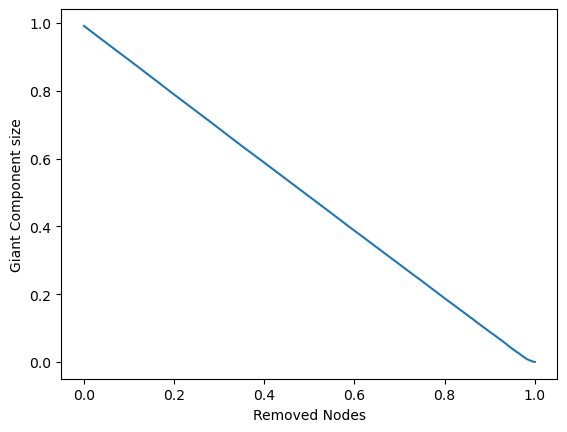

In [92]:
h = G_un.copy()
rn, comps = dismantle(h, random_node)
plot_dismantle(rn, comps)

### Targeted Attacks

Targeted Node attack (hubs are removed first)
- Giant component size has a consistent decrease when a small fraction of nodes is removed

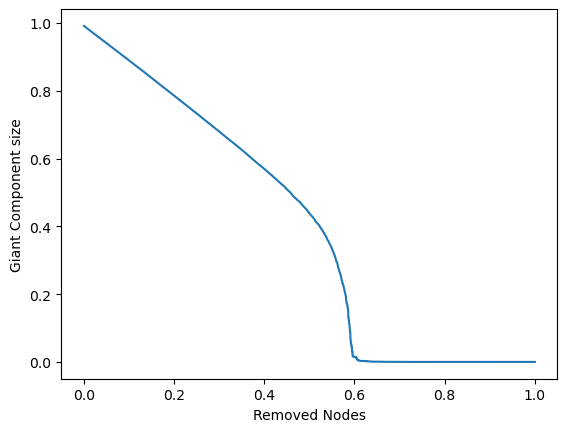

In [93]:
h = G_un.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree)
plot_dismantle(rn, comps)

Targeted Edge Attack (based on Edge Betweenness Centrality)
- Giant component size has a consistent decrease when a small fraction of nodes is removed

In [95]:
h = G_un.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality)
plot_dismantle(rn, comps)

KeyboardInterrupt: 

Targeted Edge Attack (based on Edge Harmonic Centrality)
- Giant component size has a consistent decrease when a small fraction of nodes is removed

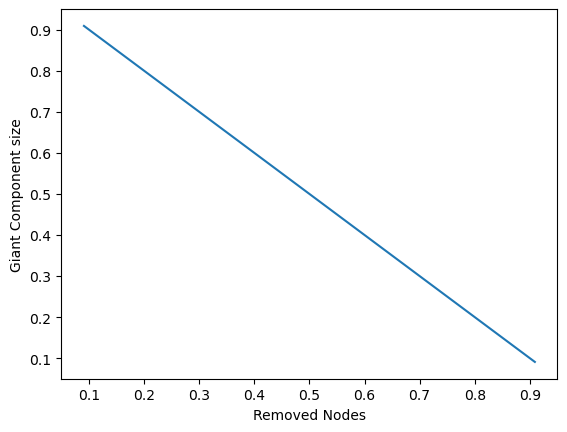

In [88]:
h = G_sub_u.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.harmonic_centrality)
plot_dismantle(rn, comps)